RESFRIAMENTO DA LITOSFERA OCEÂNICA
<br><br>
Referencia: Pg.285 do livro do Turcotte
<br><br>
(T - T0)/(T1 - T0) = erf(y/2(kx/u)^1/2)
<br><br>
 Velocidade de espalhamento e idade da litosfera para Atlântico do Norte (A. Norte) e Atlântico Sul (A. Sul), considerando Müller et al (2008)  https://doi.org/10.1029/2007GC001743

In [127]:
# MODULOS DO PYTHON

import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp

In [128]:
# FUNCOES

def depth(dT1,dT2,k,t): # Calcula a profundidade da isoterma
    aux1 = sp.erfinv(dT1/dT2)
    y = aux1*2*(k*(t))**(1/2)
    return y

def plota(dT1,dT2,k,t,t0,u): # Plota os resultados
    plt.figure()
    for i in range(len(dT1)):
        y = depth(dT1[i],dT2,k,t)
        plt.plot(t0,y/1000,label=str(dT1[i])+" K")
    plt.gca().invert_yaxis()
    plt.ylabel("Profundidade (km)"); plt.xlabel("Tempo (M.a.)")
    plt.legend()

    plt.figure()

    cor = ['-k','-b']
    lb = ["A. Norte (1000 K)","A. Sul (1000 K)"]
    for i in range(len(u)):
        if i == 0:
            idx = t0[170]
        elif i == 1:
            idx = t0[140]
        
        x = t[0:idx]*u[i] # distancia maxima da dorsal
        
        plt.plot(-x/1000,y[0:idx]/1000,cor[i],label=lb[i])
        plt.plot(x/1000,y[0:idx]/1000,cor[i])
    plt.gca().invert_yaxis()
    plt.ylabel("Profundidade (km)"); plt.xlabel("Distancia (km)")
    plt.legend()
    plt.show()

In [129]:
# PARAMETROS DO MODELO

dT1 = np.arange(200,1200,200) # temperatura (K)
dT2 = 1300 # temperatura (K)
t0 = np.arange(0,281) # tempo (M.a.)
tt = 1*60*60*24*365*1e6 # conversao M.a. para s
t = t0*tt# tempo (s) 
k = 1e-6 # (m²/s)
eo = np.array([0.015,0.025]) # velocidade de espalhamento (m/ano)
u = eo/(1*60*60*24*365)# velocidade da litosfera em (m/s)

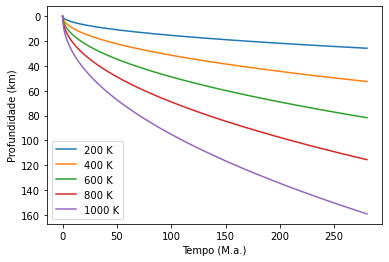

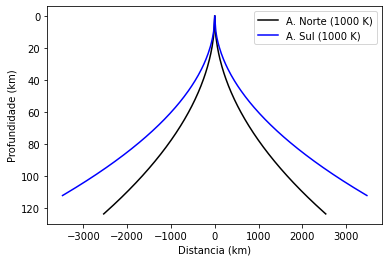

In [130]:
# MODULO PRINCIPAL

plota(dT1,dT2,k,t,t0,u)